# **Python Project**

Importing the required libraries

In [ ]:
#Importing required Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import re
import nltk
import string

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,KFold, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Data** **Wrangling and Visualization**

In [ ]:
# Importing the CSV file
df = pd.read_csv("/content/drive/MyDrive/fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
# Data shape and columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
df.shape

(17880, 18)

In [ ]:
# Missing Values identification
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
#Rows duplicate check in the data
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.shape

(17880, 18)

In [ ]:
# # Removing the missing values in the data
# df.dropna(axis= 0, how= 'any', inplace=True)
# df.isnull().sum()

In [ ]:
# Feature Selection
df = df[["title","description","benefits","location","company_profile","requirements","telecommuting","has_company_logo","has_questions","employment_type","required_experience","required_education","industry","function","salary_range","fraudulent"]]

In [ ]:
# Extracting Text and categorical features
text_df = df[["title","company_profile","description", "requirements", "benefits","fraudulent"]]
cate_df = df[["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education", "industry", "function","fraudulent"]]
text_df = text_df.fillna(" ")
cate_df = cate_df.fillna("None")

### **Data Analysis**

([<matplotlib.patches.Wedge at 0x7d3ba1a3d6c0>,
 [Text(-0.1667308354403493, -1.0872905906487758, 'Real Post'),
  Text(0.1667308863400957, 1.0872905828435406, 'Fake Post')],
 [Text(-0.09094409205837234, -0.5930675948993321, '95.2%'),
  Text(0.09094411982187038, 0.5930675906419312, '4.8%')])

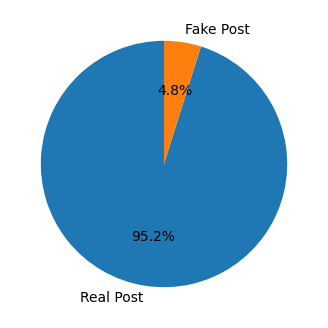

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(
    df["fraudulent"].value_counts(),
    labels=['Real Post', 'Fake Post'],
    autopct='%1.1f%%',
    startangle=90,
)
#df["fraudulent"].value_counts().plot(kind='pie', labels=['Real Post (95%)', 'Fake Post (5%)'])

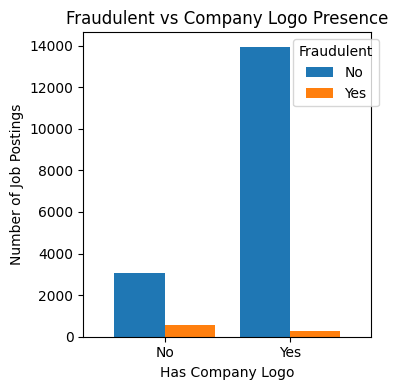

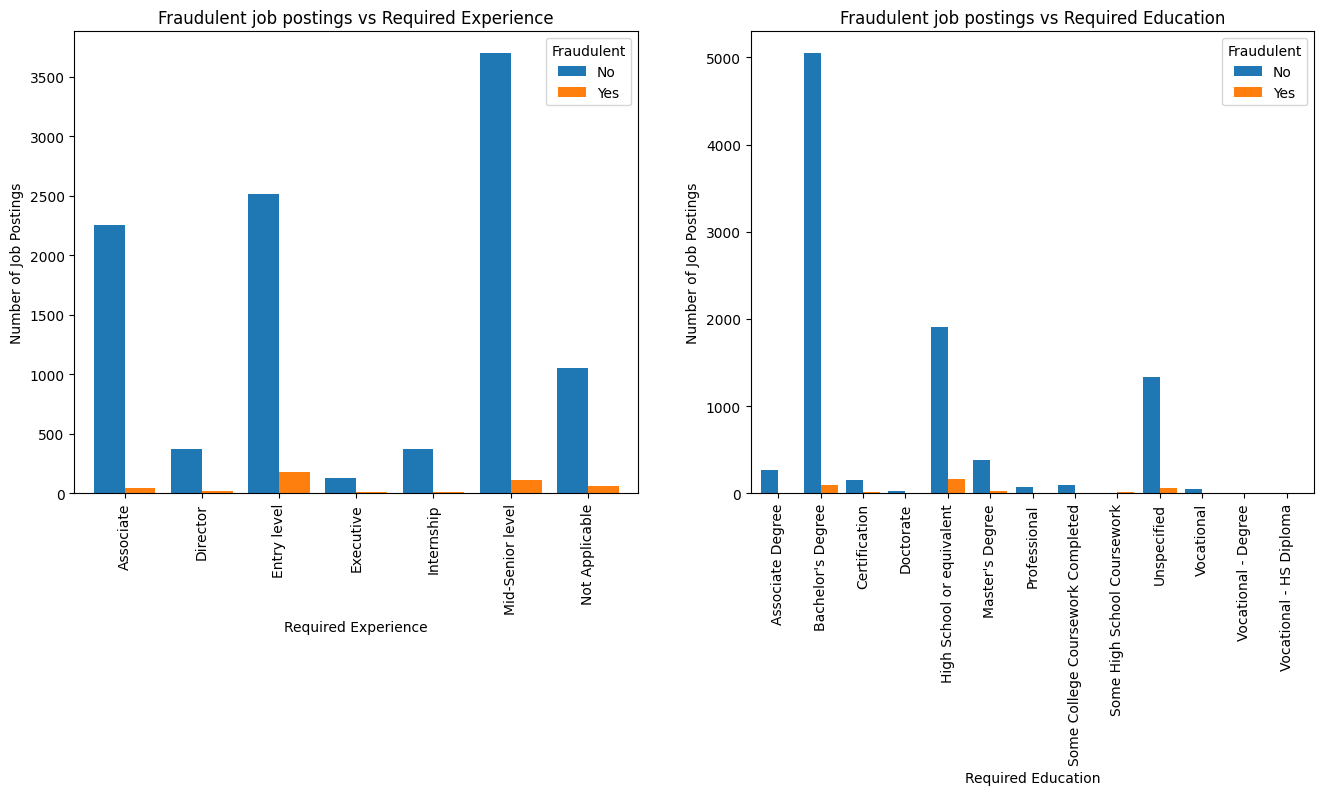

In [ ]:
# Investigating the relation betweeen required_experience, has_company_logo, required_education and fraudulent

has_company_logo_fraudulent= pd.crosstab(df['has_company_logo'],df['fraudulent'])
required_experience_fraudulent = pd.crosstab(df['required_experience'],df['fraudulent'])
required_education_fraudulent = pd.crosstab(df['required_education'],df['fraudulent'])

def plot_bar(dataframe,title,xlabel,ylabel,ticks_labels):
  ax = dataframe.plot(kind='bar',figsize=(4,4),width=0.8)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.xticks(ticks=[0,1],labels=ticks_labels,rotation = 0)
  plt.legend(title='Fraudulent', labels = ['No','Yes'], bbox_to_anchor=(1.05,1),loc='best')
  plt.tight_layout()
  plt.show()

#Company logo vs Fraudulent
plot_bar(has_company_logo_fraudulent,'Fraudulent vs Company Logo Presence',
         'Has Company Logo', 'Number of Job Postings',['No','Yes'])

def plot_bar_categorical(dataframe,title,xlabel,ylabel,ax):
  dataframe.plot(kind='bar',ax=ax, width=0.8, stacked=False)
  ax.set_title(title)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_xticklabels(dataframe.index,rotation=90)
  ax.legend(title='Fraudulent',labels=['No','Yes'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#Required Experience vs Fraudulent
plot_bar_categorical(required_experience_fraudulent,
                     'Fraudulent job postings vs Required Experience',
                     'Required Experience',
                     'Number of Job Postings',
                     ax = axes[0]
                     )
#Required Education vs Fraudulent
plot_bar_categorical(required_education_fraudulent,
                     'Fraudulent job postings vs Required Education',
                     'Required Education',
                     'Number of Job Postings',
                     ax = axes[1]
                     )

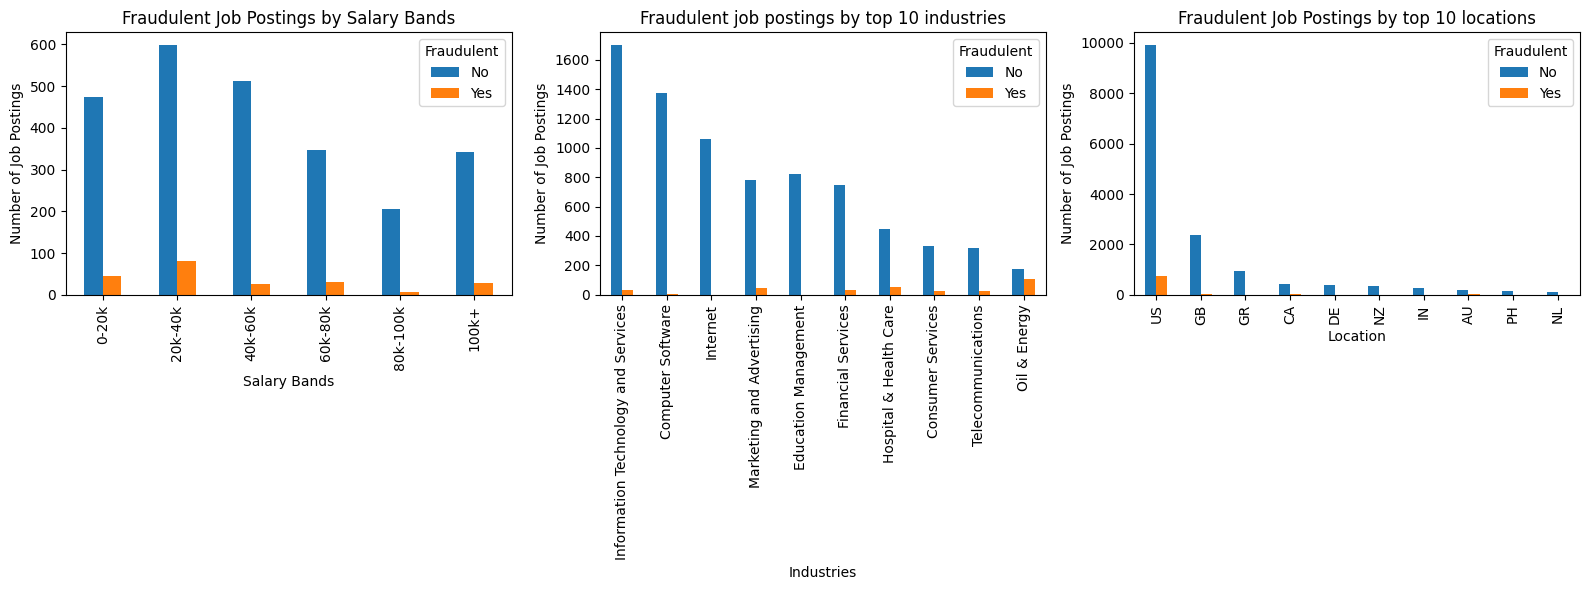

In [ ]:
# Salary Range comparision
#Salary range is of the form '1000-2000', we need to parse it

def parse_salary_range(salary_str):
  if pd.isnull(salary_str):
    return None

  try:
    salary_split = salary_str.split('-')
    if len(salary_split) == 2:
      return (float(salary_split[0])+float(salary_split[1]))/2
    return float(salary_split[0])
  except:
    return None

def cal_categorical_ratios(categorical_crosstab):
  ratio_df = categorical_crosstab.div(categorical_crosstab.sum(axis=1),axis=0)
  return ratio_df

employment_type_fraudulent = pd.crosstab(df['employment_type'],df['fraudulent'])

df['average_salary'] = df['salary_range'].apply(parse_salary_range)

salary_bands = pd.cut(df['average_salary'],bins=[0, 20000, 40000, 60000, 80000, 100000, np.inf],
                      labels=['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k+'])

# Fraudulent postings in each salary band
salary_band_fraudulent = pd.crosstab(salary_bands,df['fraudulent'])
salary_band_ratios = cal_categorical_ratios(salary_band_fraudulent)

#Industry vs Fraudulent job postings
industry_fake = pd.crosstab(df['industry'],df['fraudulent'])
top_industries = industry_fake.sum(axis=1).sort_values(ascending=False).head(10).index
top_industries_fake = industry_fake.loc[top_industries]

#Location vs Fraudulent job postings
def location_divide(loc_str):
    if pd.isnull(loc_str):
        return None
    try:
        loc_parts = loc_str.split(',')
        return (loc_parts[0])
    except ValueError:
        return None

df['country'] = df['location'].apply(location_divide)
location_fake = pd.crosstab(df['country'],df['fraudulent'])
top_locations = location_fake.sum(axis=1).sort_values(ascending=False).head(10).index
top_locations_fake = location_fake.loc[top_locations]


fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,6))

salary_band_fraudulent.plot(kind='bar',ax = ax1 , width=0.5)
ax1.set_title('Fraudulent Job Postings by Salary Bands')
ax1.set_xlabel('Salary Bands')
ax1.set_ylabel('Number of Job Postings')
ax1.set_xticks(ax1.get_xticks())
ax1.legend(title='Fraudulent', labels=['No', 'Yes'])

top_industries_fake.plot(kind='bar',ax = ax2, width=0.5)
ax2.set_title('Fraudulent job postings by top 10 industries')
ax2.set_xlabel('Industries')
ax2.set_ylabel('Number of Job Postings')
ax2.set_xticks(ax2.get_xticks())
ax2.legend(title='Fraudulent', labels=['No', 'Yes'])

top_locations_fake.plot(kind='bar',ax=ax3,width=0.5)
ax3.set_title('Fraudulent Job Postings by top 10 locations')
ax3.set_xlabel('Location')
ax3.set_ylabel('Number of Job Postings')
ax3.set_xticks(ax3.get_xticks())
ax3.legend(title='Fraudulent', labels=['No', 'Yes'])

fig.tight_layout()
plt.show()




**Comparision based on the word count**

Comparing the number of words in the fake post and real post.

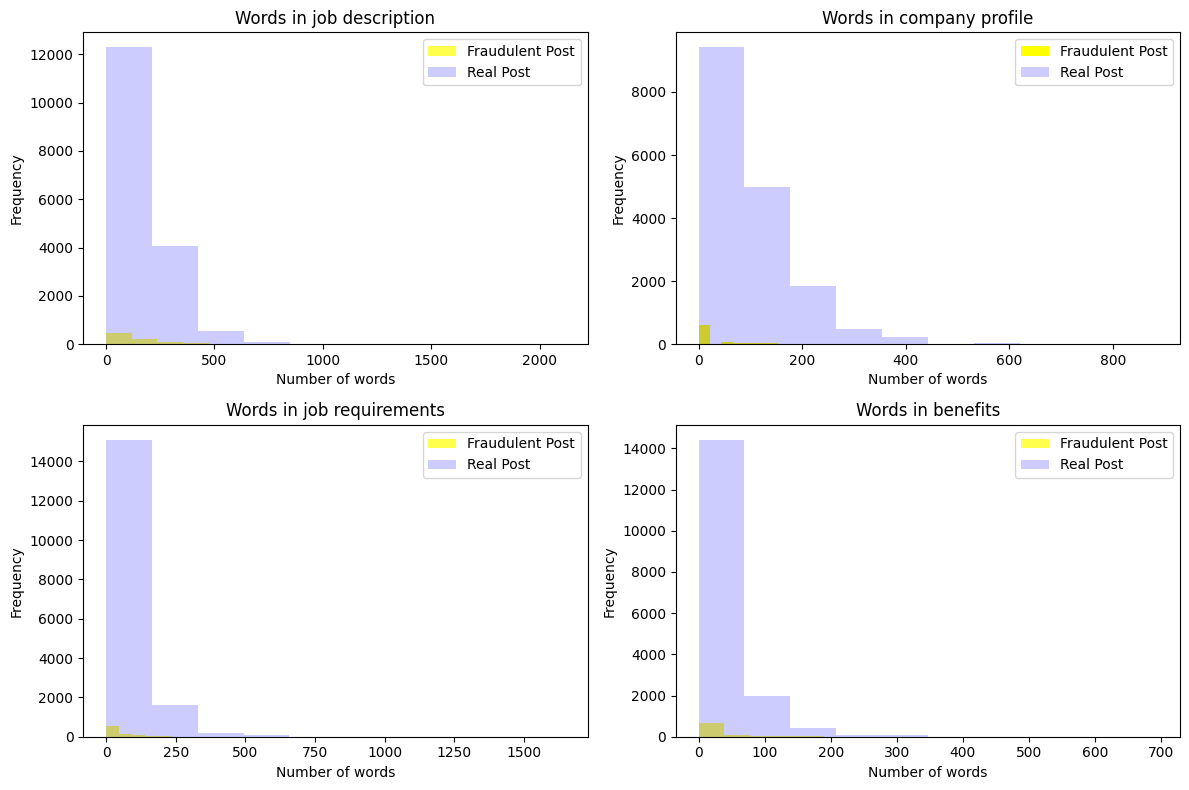

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(12,8),dpi=100)

ax1,ax2,ax3,ax4 = axes.flatten()
fake_num_text_des = text_df[text_df['fraudulent']== 1 ]['description'].str.split().map(lambda x:len(x))
real_num_text_des = text_df[text_df['fraudulent']== 0 ]['description'].str.split().map(lambda x:len(x))

fake_num_text_cp = text_df[text_df['fraudulent']== 1 ]['company_profile'].str.split().map(lambda x:len(x))
real_num_text_cp = text_df[text_df['fraudulent']== 0 ]['company_profile'].str.split().map(lambda x:len(x))

fake_num_text_req = text_df[text_df['fraudulent']== 1 ]['requirements'].str.split().map(lambda x:len(x))
real_num_text_req = text_df[text_df['fraudulent']== 0 ]['requirements'].str.split().map(lambda x:len(x))

fake_num_text_ben = text_df[text_df['fraudulent']== 1 ]['benefits'].str.split().map(lambda x:len(x))
real_num_text_ben = text_df[text_df['fraudulent']== 0 ]['benefits'].str.split().map(lambda x:len(x))


ax1.hist(fake_num_text_des,bins=10,color = 'yellow',alpha = 0.7,label = 'Fraudulent Post')
ax1.hist(real_num_text_des,bins=10,color='blue',alpha=0.2,label = 'Real Post')
ax1.set_title("Words in job description")
ax1.set_xlabel("Number of words")
ax1.set_ylabel("Frequency")
ax1.legend()

ax2.hist(fake_num_text_cp,bins=10,color = 'yellow',alpha = 1,label = 'Fraudulent Post')
ax2.hist(real_num_text_cp,bins=10,color='blue',alpha=0.2,label = 'Real Post')
ax2.set_title("Words in company profile")
ax2.set_xlabel("Number of words")
ax2.set_ylabel("Frequency")
ax2.legend()

ax3.hist(fake_num_text_req,bins=10,color = 'yellow',alpha = 0.7,label = 'Fraudulent Post')
ax3.hist(real_num_text_req,bins=10,color='blue',alpha=0.2,label = 'Real Post')
ax3.set_title("Words in job requirements")
ax3.set_xlabel("Number of words")
ax3.set_ylabel("Frequency")
ax3.legend()

ax4.hist(fake_num_text_ben,bins=10,color = 'yellow',alpha = 0.7,label = 'Fraudulent Post')
ax4.hist(real_num_text_ben,bins=10,color='blue',alpha=0.2,label = 'Real Post')
ax4.set_title("Words in benefits")
ax4.set_xlabel("Number of words")
ax4.set_ylabel("Frequency")
ax4.legend()
plt.tight_layout()
plt.show()

### **Ngrams Analysis**

In [ ]:
# Preparing the text data for preprocessing
text = text_df[text_df.columns[0:-1]].apply(lambda x:','.join(x.dropna().astype(str)),axis=1)
target = df['fraudulent']

print(len(text))
print(len(target))

17880
17880


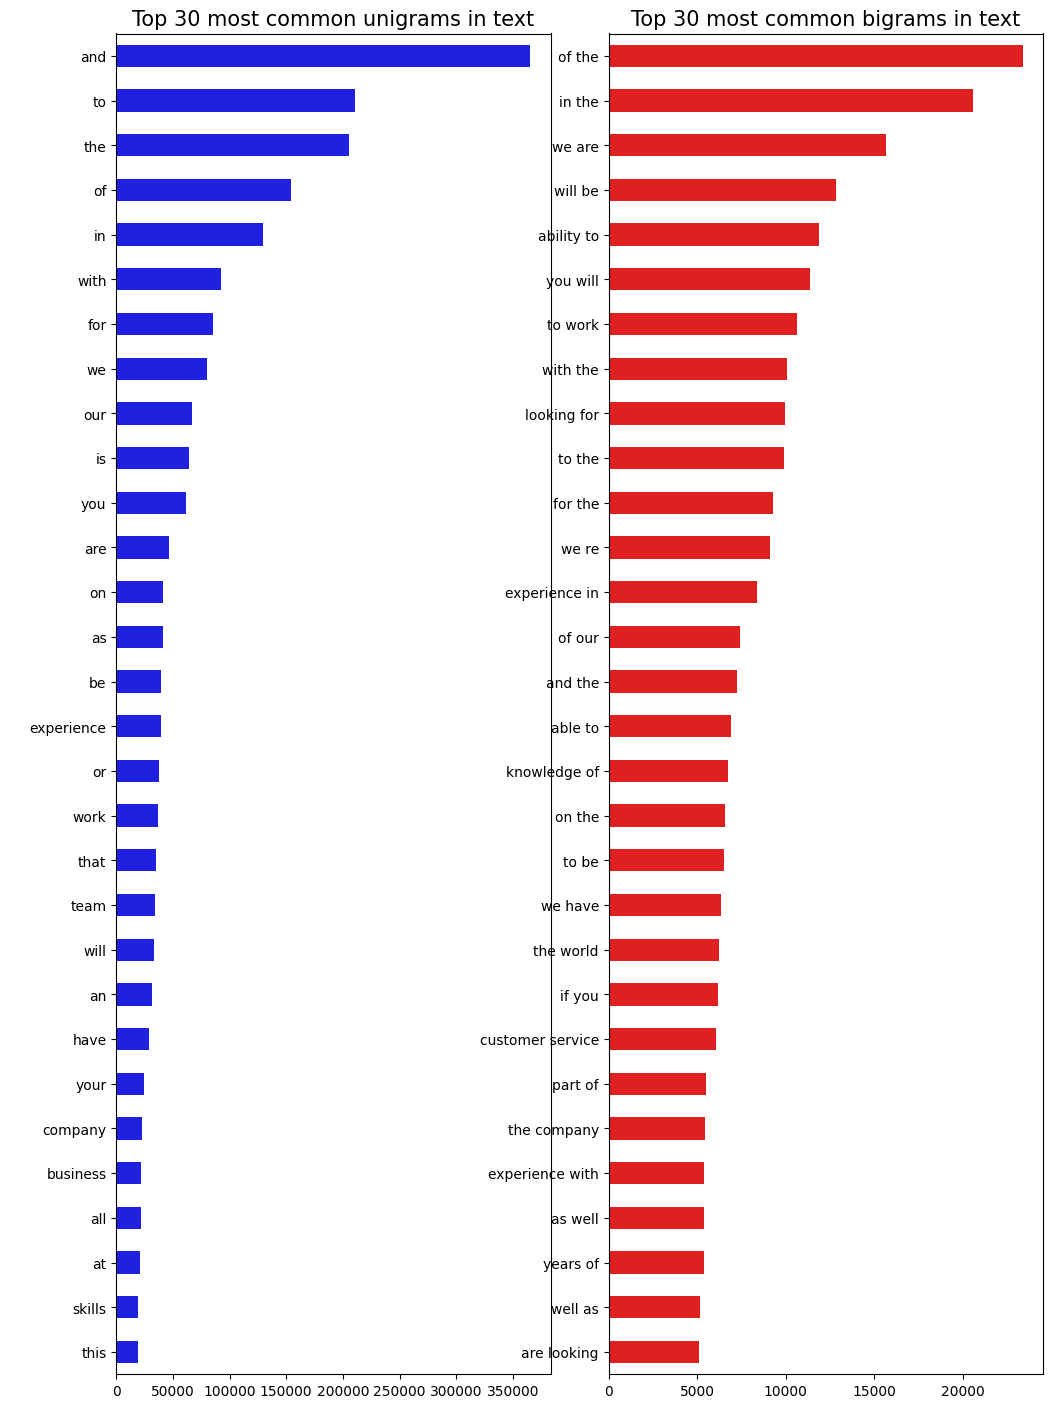

In [ ]:
def get_top_unigrams(corpus,n=None):
  vec = CountVectorizer(ngram_range=(1,1)).fit(corpus)
  words_bag = vec.transform(corpus)
  words_sum = words_bag.sum(axis=0)
  words_freq = [(word,words_sum[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key=lambda x:x[1],reverse=True)
  return words_freq[:n]

def get_top_bigrams(corpus,n=None):
  vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
  words_bag = vec.transform(corpus)
  words_sum = words_bag.sum(axis=0)
  words_freq = [(word, words_sum[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key=lambda x:x[1],reverse=True)
  return words_freq[:n]


fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,14),dpi=100)
plt.tight_layout()

unigrams = get_top_unigrams(text)[:30]
x,y=map(list,zip(*unigrams))
sb.barplot(x=y,y=x,ax=ax1,width=0.5,color='blue')

bigrams = get_top_bigrams(text)[:30]
x,y=map(list,zip(*bigrams))
sb.barplot(x=y,y=x,ax=ax2,width=0.5,color='Red')

ax1.set_ylabel(' ')
ax2.set_ylabel(' ')

ax1.set_title('Top 30 most common unigrams in text', fontsize=15)
ax2.set_title('Top 30 most common bigrams in text', fontsize=15)

plt.show()

In [ ]:
#df['fraudulent'].value_counts()

fake_1 = df[df['fraudulent'] == 1]
not_fake = df[df['fraudulent']==0]

print(fake_1.shape)
not_fake.shape

(866, 18)


(17014, 18)

In [ ]:
fake_1=fake_1.sample(1000,replace = True)
not_fake = not_fake.sample(1000,replace=True)
fake_1.shape, not_fake.shape

((1000, 18), (1000, 18))

In [ ]:
df

,title,description,benefits,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent,average_salary,country
0,Marketing Intern,"Food52, a fast-growing, James Beard Award-winn...",NaN,"US, NY, New York","We're Food52, and we've created a groundbreaki...",Experience with content management systems a m...,0,1,0,Other,Internship,NaN,NaN,Marketing,NaN,0,NaN,US
1,Customer Service - Cloud Video Production,Organised - Focused - Vibrant - Awesome!Do you...,What you will get from usThrough being part of...,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",What we expect from you:Your key responsibilit...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,NaN,0,NaN,NZ
2,Commissioning Machinery Assistant (CMA),"Our client, located in Houston, is actively se...",NaN,"US, IA, Wever",Valor Services provides Workforce Solutions th...,Implement pre-commissioning and commissioning ...,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,US
3,Account Executive - Washington DC,THE COMPANY: ESRI – Environmental Systems Rese...,Our culture is anything but corporate—we have ...,"US, DC, Washington",Our passion for improving quality of life thro...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,NaN,0,NaN,US
4,Bill Review Manager,JOB TITLE: Itemization Review ManagerLOCATION:...,Full Benefits Offered,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,NaN,0,NaN,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,Just in case this is the first time you’ve vis...,What can you expect from us?We have an open cu...,"CA, ON, Toronto",Vend is looking for some awesome new talent to...,To ace this role you:Will eat comprehensive St...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,NaN,0,NaN,CA
17876,Payroll Accountant,The Payroll Accountant will focus primarily on...,Health &amp; WellnessMedical planPrescription ...,"US, PA, Philadelphia",WebLinc is the e-commerce platform and service...,- B.A. or B.S. in Accounting- Desire to have f...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,NaN,0,NaN,US
17877,Project Cost Control Staff Engineer - Cost Con...,Experienced Project Cost Control Staff Enginee...,NaN,"US, TX, Houston",We Provide Full Time Permanent Positions for m...,At least 12 years professional experience.Abil...,0,0,0,Full-time,NaN,NaN,NaN,NaN,NaN,0,NaN,US
17878,Graphic Designer,Nemsia Studios is looking for an experienced v...,Competitive salary (compensation will be based...,"NG, LA, Lagos",NaN,1. Must be fluent in the latest versions of Co...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,NaN,0,NaN,NG


In [ ]:
#Balancing the dataset
df = pd.concat([fake_1,not_fake],ignore_index=True)
#df = fake_1.append(not_fake)
df.reset_index()

,index,title,description,benefits,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent,average_salary,country
0,0,Virtual Administrative Clerk,We are seeking individuals to be connected wit...,NaN,"US, KY, Louisville",NaN,Home Office SuppliesComputer with internet acc...,1,0,0,NaN,Entry level,Some High School Coursework,NaN,Administrative,NaN,1,NaN,US
1,1,COMPANY REPRESENTATIVE NEEDED,Our motherless world for Charity location has ...,bonus will be given base on base on the amount...,"US, NY, mumford",NaN,must have a paypal account.,0,0,1,Contract,Not Applicable,High School or equivalent,Civic & Social Organization,Finance,NaN,1,NaN,US
2,2,Easy Money,"""Do You Want To Own Your Internet Base Busines...",Work from home Full-time or Part-time be your ...,"US, FL, Deltona",DMT Instant Reward. We are Hiring all The Time.,"Computer, Internet and Telephone",0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,US
3,3,Cruise Staff Wanted *URGENT*,6* Ultra Luxury American Cruise Company is urg...,Benefits: On board en suite accommodation and ...,"US, TX, HOUSTON",NaN,Certification &amp; Experience: Previous exper...,0,0,1,NaN,NaN,NaN,"Leisure, Travel & Tourism",NaN,NaN,1,NaN,US
4,4,Clerical Personnel,Help maintain office functionality by fulfilli...,"Organizational and planning, time management s...","US, OH, Cincinnati",Bradley Contracting Group Corporation offers a...,answering and directing phone callsmaking phon...,0,1,1,Full-time,Entry level,High School or equivalent,Human Resources,Human Resources,NaN,1,NaN,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Civil Estimator,My client is currently seeking an experienced ...,NaN,"GB, NTT,",NaN,NaN,0,0,0,Full-time,NaN,NaN,Civil Engineering,Consulting,35000-40000,0,37500.0,GB
1996,1996,Software Project Manager,Skookum Digital Works is looking for a motivat...,NaN,"US, NC, Charlotte",NaN,NaN,0,0,1,Full-time,Mid-Senior level,NaN,Computer Software,Project Management,NaN,0,NaN,US
1997,1997,Junior Art Director/Designer,The Junior Art Director/Designer is responsibl...,Compensation:Competitive salary structure base...,"CA, ON, Toronto",NaN,Key Responsibilities:Create and support the de...,0,0,0,Full-time,Entry level,Bachelor's Degree,Marketing and Advertising,Art/Creative,NaN,0,NaN,CA
1998,1998,Supply Chain Specialist,POS-X is a rapidly growing point-of-sale hardw...,"$32k - $46k / year, DOE + Performance WageHeal...","US, WA, Bellingham",POS-X is a rapidly growing point-of-sale hardw...,Self motivated with ability to manage daily ac...,0,1,1,Full-time,NaN,Bachelor's Degree,Computer Hardware,Supply Chain,32000-46000,0,39000.0,US


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['title'] = le.fit_transform(df['title'])
df['location']= le.fit_transform(df['location'])
df['company_profile'] = le.fit_transform(df['company_profile'])
df['requirements'] = le.fit_transform(df['requirements'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['required_experience'] = le.fit_transform(df['required_experience'])
df['required_education'] = le.fit_transform(df['required_education'])
df['industry'] = le.fit_transform(df['industry'])
df['function'] = le.fit_transform(df['function'])
df['salary_range'] = le.fit_transform(df['salary_range'])

df = df.reset_index()
df.head(10)

,index,title,description,benefits,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent,average_salary,country
0,0,1153,We are seeking individuals to be connected wit...,NaN,439,439,391,1,0,0,5,2,8,92,1,171,1,NaN,US
1,1,168,Our motherless world for Charity location has ...,bonus will be given base on base on the amount...,581,439,1038,0,0,1,0,6,4,10,13,171,1,NaN,US
2,2,381,"""Do You Want To Own Your Internet Base Busines...",Work from home Full-time or Part-time be your ...,359,105,216,0,1,1,5,7,12,92,36,171,1,NaN,US
3,3,263,6* Ultra Luxury American Cruise Company is urg...,Benefits: On board en suite accommodation and ...,658,439,207,0,0,1,5,7,12,53,36,171,1,NaN,US
4,4,215,Help maintain office functionality by fulfilli...,"Organizational and planning, time management s...",588,72,1032,0,1,1,1,2,4,44,17,171,1,NaN,US
5,5,618,2175Job Title: Journeyman ElectricianRole: Eng...,NaN,695,439,197,0,0,0,1,7,12,92,36,171,1,NaN,US
6,6,981,Senior Engineering Product Manager | Taiwan Ta...,What Is Offered:Very competitive base salary.3...,240,42,1092,0,1,1,1,5,1,85,12,171,1,NaN,TW
7,7,1211,Title: Service Desk ResourceLocation: Atlant...,NaN,384,439,549,0,1,1,0,5,1,48,18,129,1,60.0,US
8,8,801,Job DescriptionVertex Global Solutions seeks ...,NaN,567,439,1092,0,0,0,4,2,9,85,1,171,1,NaN,US
9,9,750,Job Description:SENIOR MANAGER OF MAINTENANCE ...,NaN,659,439,281,0,0,0,1,7,12,65,12,171,1,NaN,US


**Creating Train and Test data**

In [ ]:
# Splitting the data for training and testing
from sklearn.model_selection import train_test_split
X = df[['index', 'title', 'location', 'company_profile', 'requirements',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'salary_range']].values
Y = df[['fraudulent']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1500, 14), (500, 14), (1500, 1), (500, 1))

### **Training the model using different algorithms**

Independent Variable is X.
Dependent Variable is Y.

Algorithms used are:


### **1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, Y_train)

# Testing the model
Y_predict = LR.predict(X_test)
Y_test = Y_test.flatten()
Y_predict = Y_predict.flatten()
LR_df = pd.DataFrame({'Test Data Y':Y_test, 'Predicted Data Y': Y_predict})
LR_df

,Test Data Y,Predicted Data Y
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
495,0,0
496,1,1
497,0,0
498,1,1


In [ ]:

# Checking accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(Y_predict,Y_test)

0.948

**Accuracy of the model using the Logistic Regression Algorithm is 95.21%**

### **2. Naive Bayes Algorithm**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

#Training the model
nb.fit(X_train,Y_train)

#Predicting the Y data
Y_predict_NB = nb.predict(X_test)

accuracy = accuracy_score(Y_test,Y_predict_NB)
print(f"Accuracy Score of the model: {accuracy:.2f}")

Accuracy Score of the model: 0.96


**Accuracy of the model using the Naive Bayes Algorithm is 94**

### **3. K Nearest Neighbours**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

#Training the Model
KNN.fit(X_train,Y_train)

#Testing the Model
Y_predict_knn = KNN.predict(X_test)

print("Accuracy Score of the model using KNN algorithm:",accuracy_score(Y_predict_knn,Y_test))


Accuracy Score of the model using KNN algorithm: 0.98


**Accuracy of the model using KNN Algorithm is 95.77%**

### **4. Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)

#Training the model
dtc.fit(X_train,Y_train)

#Testing the model
Y_predict_dtc = dtc.predict(X_test)

print("Accuracy Score of the model using Decision Tree algorithm:",accuracy_score(Y_predict_dtc,Y_test))



Accuracy Score of the model using Decision Tree algorithm: 1.0


**Accuracy of the model using Decision Tree Algorithm is 97%**

### **5. Random Forest Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

#Training the model
rfc.fit(X_train,Y_train)

#Testing the model
Y_predict_RF = rfc.predict(X_test)

print("Accuracy Score of the model using Random Forest algorithm:",accuracy_score(Y_predict_RF,Y_test))

Accuracy Score of the model using Random Forest algorithm: 1.0


**Accuracy of the model using Random Forest Algorithm is 98%**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator
import warnings
warnings.filterwarnings("ignore")


class DummyEstimator(BaseEstimator):
    def fit(self): pass
    def score(self): pass

# Create a pipeline
pipe = Pipeline([('model', DummyEstimator())])  # Placeholder for the actual model

# Define the parameter grid
param_grid = [
    {'model': [LogisticRegression()],
     'model__C': [0.1, 1, 10],
     'model__solver': ['liblinear']},
    {'model': [KNeighborsClassifier()],
     'model__n_neighbors': [3, 5, 7],
     'model__weights': ['uniform', 'distance']},
    {'model': [DecisionTreeClassifier()],
     'model__max_depth': [10, 20, None],
     'model__min_samples_split': [2, 5]},
    {'model': [RandomForestClassifier()],
     'model__n_estimators': [50, 100],
     'model__max_depth': [10, 20, None]}
]

# Set up GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, Y_train)

# Output the best model and its parameters
print('Best model type: ', grid_search.best_estimator_.get_params()['model'])
print('Best parameters: ', grid_search.best_params_)
print('Best accuracy: ', grid_search.best_score_)


Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best model type:  RandomForestClassifier(n_estimators=50)
Best parameters:  {'model': RandomForestClassifier(n_estimators=50), 'model__max_depth': None, 'model__n_estimators': 50}
Best accuracy:  1.0


### Text Cleaning and removing stopwords

In [ ]:

# Removing links, punctuation and numbers
def text_cleaning(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  return text

stop_words = stopwords.words('english')
def remove_stopwords(text):
  words = [w for w in text if w not in stop_words]
  return words

def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

text = text.apply(lambda x: text_cleaning(x))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
text = text.apply(lambda x: tokenizer.tokenize(x))
text = text.apply(lambda x : remove_stopwords(x))
text = text.apply(lambda x : combine_text(x))
text.head(3)


0    marketing internwere weve created groundbreaki...
1    customer service cloud video seconds worlds cl...
2    commissioning machinery assistant cmavalor ser...
dtype: object